In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

plt.style.use('dark_background')

In [2]:
strava_color = '#fc4c02'

folder = 'D:/Carlos/MyDocuments/MSc_Fisica_Avanzada_UNED/1C_Ciencia_Analisis_Datos/Final_Project/strava_history/'

data = pd.read_csv(folder+'activities.csv')
data.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Weather Ozone,"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count"">Jump Count</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit"">Total Grit</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow"">Avg Flow</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged"">Flagged</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">Avg Elapsed Speed</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.dirt_distance"">Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_distance"">Newly Explored Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_dirt_distance"">Newly Explored Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.sport_type"">Sport Type</span>"
0,737142108,"Oct 7, 2016, 8:56:47 AM",Pedalada de mañana,Ride,NaN,8668,40.86,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,772348809,"Nov 11, 2016, 10:35:51 AM",Vuelta en bici a la hora del almuerzo,Ride,NaN,14063,51.73,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,791388617,"Dec 2, 2016, 10:53:06 AM",Vuelta en bici a la hora del almuerzo,Ride,NaN,8554,36.76,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,795145644,"Dec 6, 2016, 11:48:08 AM",Vuelta en bici a la hora del almuerzo,Ride,NaN,5914,31.19,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,795982182,"Dec 7, 2016, 12:26:46 PM",Pedalada de tarde,Ride,NaN,4611,22.12,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_filtered = data[['Activity Date', 'Activity Type', 'Elapsed Time', 'Distance', 'Moving Time', \
                      'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation High', \
                      'Elevation Low', 'Max Grade', 'Average Grade', 'Average Watts', 'Calories', 'Bike']]

# Change units of time and velocity to h -- km/h
data_filtered['Elapsed Time'] = data_filtered[['Elapsed Time']]/3600
data_filtered['Moving Time'] = data_filtered[['Moving Time']]/3600
data_filtered['Max Speed'] = data_filtered[['Max Speed']]*3.6
data_filtered['Average Speed'] = data_filtered[['Average Speed']]*3.6
data_filtered['Distance'] = [float(str(i).replace(",", ".")) for i in data_filtered['Distance']]
# data_filtered['Distance'] = data_filtered['Distance'].replace(',','.')
# data_filtered['Distance'] = data_filtered['Distance'].astype(float) 

# Transform date
data_filtered.rename(columns={"Activity Date": "date"}, inplace=True)
data_filtered[['Day','Year','Hour']] = data_filtered.date.str.split(',', expand=True)
data_filtered['Year'] = data_filtered['Year'].astype(int) 
data_filtered[['Month','Day']] = data_filtered.Day.str.split(' ', expand=True)
data_filtered['Day'] = data_filtered['Day'].astype(int) 
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
data_filtered['Month'] = pd.Categorical(data_filtered['Month'], categories=months, ordered=True)

data_filtered.head()

C:\Users\cmore\AppData\Local\Temp\ipykernel_19412\3261806356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Elapsed Time'] = data_filtered[['Elapsed Time']]/3600
C:\Users\cmore\AppData\Local\Temp\ipykernel_19412\3261806356.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Moving Time'] = data_filtered[['Moving Time']]/3600
C:\Users\cmore\AppData\Local\Temp\ipykernel_19412\3261806356.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,date,Activity Type,Elapsed Time,Distance,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation High,Elevation Low,Max Grade,Average Grade,Average Watts,Calories,Bike,Day,Year,Hour,Month
0,"Oct 7, 2016, 8:56:47 AM",Ride,2.407778,40.86,2.389722,64.439999,NaN,927.384827,NaN,1701.800049,1122.500000,21.100000,0.061174,NaN,NaN,NaN,7,2016,8:56:47 AM,Oct
1,"Nov 11, 2016, 10:35:51 AM",Ride,3.906389,51.73,3.470000,47.880001,NaN,1015.005615,NaN,1828.800049,1103.800049,35.900002,0.000000,NaN,NaN,NaN,11,2016,10:35:51 AM,Nov
2,"Dec 2, 2016, 10:53:06 AM",Ride,2.376111,36.76,2.191389,57.239999,NaN,546.293213,NaN,1449.000000,1099.400024,22.000000,0.000000,NaN,NaN,3370691.0,2,2016,10:53:06 AM,Dec
3,"Dec 6, 2016, 11:48:08 AM",Ride,1.642778,31.19,1.567222,39.960001,NaN,201.973495,NaN,1201.300049,1123.699951,11.400000,0.000000,NaN,NaN,3370691.0,6,2016,11:48:08 AM,Dec
4,"Dec 7, 2016, 12:26:46 PM",Ride,1.280833,22.12,1.076389,54.360001,NaN,367.208557,NaN,1497.699951,1130.000000,20.799999,0.000000,NaN,NaN,3370691.0,7,2016,12:26:46 PM,Dec


# YoY stats

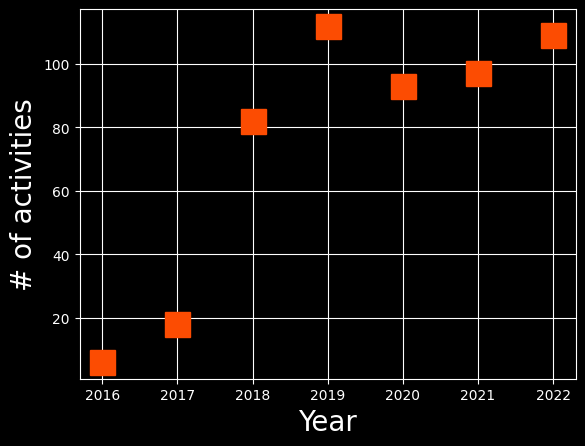

In [4]:
plt.plot(data_filtered.Year.value_counts(), marker='s', color=strava_color, markersize=18, linewidth=0)
plt.xlabel('Year', size=20)
plt.ylabel('# of activities', size=20)
plt.grid()

# 2022 stats

In [5]:
df_2022 = data_filtered[data_filtered.Year == 2022]
df_2022.head()

df_2022_bike = df_2022[df_2022['Activity Type'] == 'Ride']
df_2022_hike = df_2022[df_2022['Activity Type'] == 'Hike']
df_2022_run =  df_2022[df_2022['Activity Type'] == 'Run']
df_2022_bike.head()

,date,Activity Type,Elapsed Time,Distance,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation High,Elevation Low,Max Grade,Average Grade,Average Watts,Calories,Bike,Day,Year,Hour,Month
408,"Jan 2, 2022, 2:34:51 PM",Ride,1.514444,30.68,1.166667,67.494143,26.301052,475.729797,476.129791,1486.099976,1118.599976,13.930344,-0.001304,160.547760,751.845215,5633039.0,2,2022,2:34:51 PM,Jan
409,"Jan 3, 2022, 11:04:11 AM",Ride,1.839722,44.92,1.617500,52.351876,27.773650,325.069061,325.169037,1255.000000,1083.900024,47.649158,-0.000223,126.144562,819.011902,5633039.0,3,2022,11:04:11 AM,Jan
411,"Jan 24, 2022, 12:24:09 PM",Ride,1.035556,23.58,0.958333,64.764143,24.612230,376.214294,376.214294,1486.099976,1129.199951,10.578512,0.000000,150.818283,580.160217,5633039.0,24,2022,12:24:09 PM,Jan
412,"Jan 26, 2022, 1:37:12 PM",Ride,1.102222,31.72,1.102222,56.325936,28.782635,253.787903,253.787903,1255.000000,1098.400024,11.562963,0.000000,148.992325,659.189697,5633039.0,26,2022,1:37:12 PM,Jan
413,"Jan 28, 2022, 3:16:29 PM",Ride,1.661389,43.60,1.661389,73.560938,26.243018,524.873657,524.873657,1371.900024,1098.400024,11.658784,0.000000,140.712997,938.388977,5633039.0,28,2022,3:16:29 PM,Jan


# Bike stats 2022

In [6]:
Total_Elapsed_time = sum(df_2022_bike['Elapsed Time'])
print('Total Elapsed Time = ' + str(Total_Elapsed_time) + 'h')

Total_Moving_time = sum(df_2022_bike['Moving Time'])
print('Total Moving Time = ' + str(Total_Moving_time) + 'h')

Total_Distance = sum(df_2022_bike['Distance'])
print('Total Distance = ' + str(Total_Distance) + 'km')

Average_Speed = Total_Distance/Total_Moving_time
print('Average Speed = ' + str(Average_Speed) + 'km/h')

Max_Speed = max(df_2022_bike['Max Speed'])
print('Average Speed = ' + str(Max_Speed) + 'km/h')

Total_Elevation_Gain = sum(df_2022_bike['Elevation Gain'])
print('Total Elevation Gain = ' + str(Total_Elevation_Gain) + 'm')

Max_Elevation = max(df_2022_bike['Elevation High'])
print('Max Elevation = ' + str(Max_Elevation) + 'm')

Total_Calories = sum(df_2022_bike['Calories'])
print('Total Calories Burnt = ' + str(Total_Calories) + 'cal')

Total Elapsed Time = 207.1319444444444h
Total Moving Time = 187.83305555555555h
Total Distance = 5039.380000000001km
Average Speed = 26.82903701425173km/h
Average Speed = 102.38906250000001km/h
Total Elevation Gain = 62493.87395954132m
Max Elevation = 1899.5999755859373m
Total Calories Burnt = 117356.95010375977cal


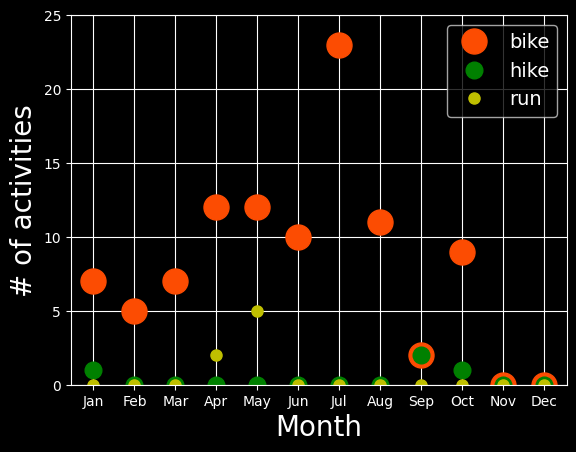

In [8]:
plt.plot(df_2022_bike[['Month','Activity Type']].groupby('Month').count(), marker='o', color=strava_color, markersize=18, linewidth=0)
plt.plot(df_2022_hike[['Month','Activity Type']].groupby('Month').count(), marker='o', color='green', markersize=12, linewidth=0)
plt.plot(df_2022_run[['Month','Activity Type']].groupby('Month').count(),  marker='o', color='y', markersize=8, linewidth=0)
plt.xlabel('Month', size=20)
plt.ylabel('# of activities', size=20)
plt.ylim([0, 25])
plt.grid()
plt.legend(['bike', 'hike', 'run'], fontsize = 14)

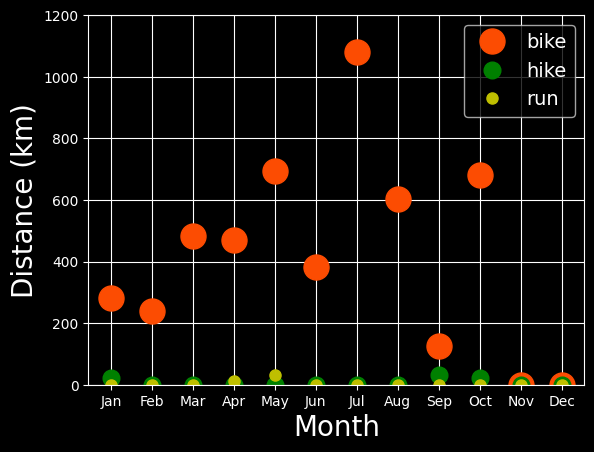

In [9]:
plt.plot(df_2022_bike[['Distance','Month']].groupby('Month').sum(), marker='o', color=strava_color, markersize=18, linewidth=0)
plt.plot(df_2022_hike[['Distance','Month']].groupby('Month').sum(), marker='o', color='green', markersize=12, linewidth=0)
plt.plot(df_2022_run[['Distance','Month']].groupby('Month').sum(), marker='o',  color='y', markersize=8, linewidth=0)
plt.xlabel('Month', size=20)
plt.ylabel('Distance (km)', size=20)
plt.ylim([0, 1200])
plt.grid()
plt.legend(['bike', 'hike', 'run'], fontsize = 14)

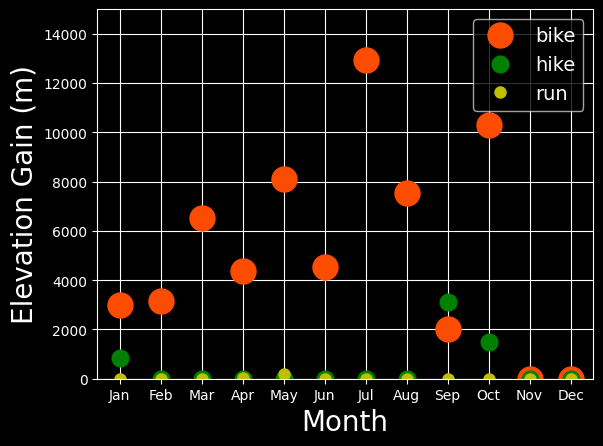

In [10]:
plt.plot(df_2022_bike[['Elevation Gain','Month']].groupby('Month').sum(), marker='o', color=strava_color, markersize=18, linewidth=0)
plt.plot(df_2022_hike[['Elevation Gain','Month']].groupby('Month').sum(), marker='o', color='green', markersize=12, linewidth=0)
plt.plot(df_2022_run[['Elevation Gain','Month']].groupby('Month').sum(),  marker='o', color='y', markersize=8, linewidth=0)
plt.xlabel('Month', size=20)
plt.ylabel('Elevation Gain (m)', size=20)
plt.ylim([0, 15000])
plt.grid()
plt.legend(['bike', 'hike', 'run'], fontsize = 14)

In [13]:
df_2022_bike.groupby('Month').count()

,date,Activity Type,Elapsed Time,Distance,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation High,Elevation Low,Max Grade,Average Grade,Average Watts,Calories,Bike,Day,Year,Hour
Month,,,,,,,,,,,,,,,,,,,
Jan,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Feb,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Mar,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Apr,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,7,12,12,12
May,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Jun,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,5,10,10,10
Jul,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,20,23,23,23
Aug,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Sep,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


# Context

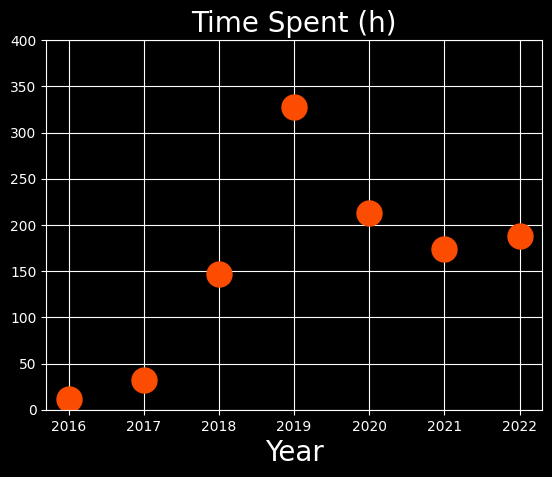

In [59]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

Total_Moving_time = []
Total_Distance = []
Average_Speed = []
Total_Elevation_Gain = []

for yy in years:
    df_aux = data_filtered[data_filtered.Year == yy]
    df_bike = df_aux[df_aux['Activity Type'] == 'Ride']
    
    Total_Moving_time.append(sum(df_bike['Moving Time']))
    Total_Distance.append(sum(df_bike['Distance']))
    Average_Speed.append(Total_Distance[-1]/Total_Moving_time[-1])
    Total_Elevation_Gain.append(sum(df_bike['Elevation Gain'].dropna()))
    
    
# add a subplot with no frame

plt.plot(years, Total_Moving_time, marker='o', color=strava_color, markersize=18, linewidth=0)
plt.xlabel('Year', size=20)
plt.title('Time Spent (h)', size=20)
plt.ylim([0, 400])
plt.grid()

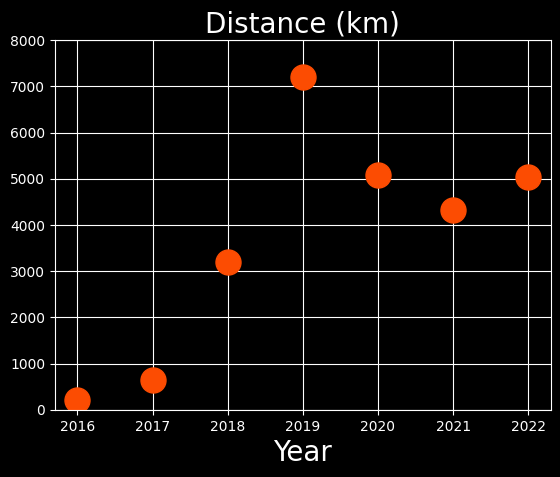

In [60]:

plt.plot(years, Total_Distance, marker='o', color=strava_color, markersize=18, linewidth=0)
plt.xlabel('Year', size=20)
plt.title('Distance (km)', size=20)
plt.ylim([0, 8000])
plt.grid()


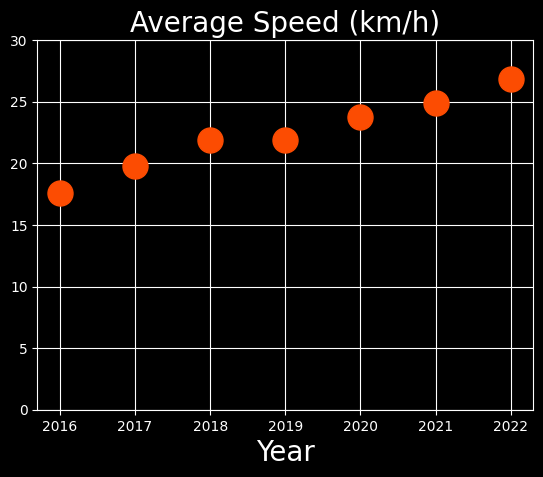

In [61]:

plt.plot(years, Average_Speed, marker='o', color=strava_color, markersize=18, linewidth=0)
plt.xlabel('Year', size=20)
plt.title('Average Speed (km/h)', size=20)
plt.ylim([0, 30])
plt.grid()


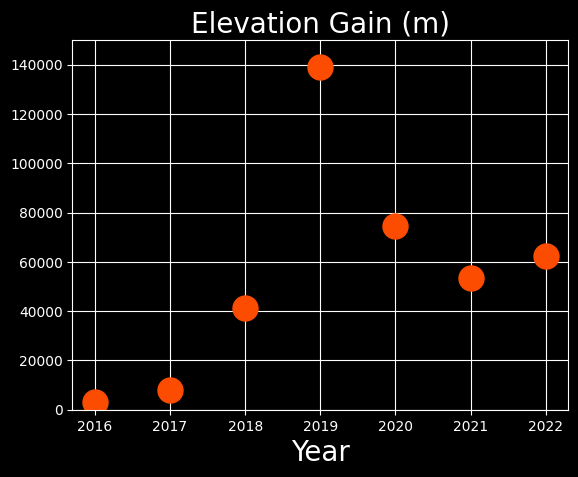

In [62]:

plt.plot(years, Total_Elevation_Gain, marker='o', color=strava_color, markersize=18, linewidth=0)
plt.xlabel('Year', size=20)
plt.title('Elevation Gain (m)', size=20)
plt.ylim([0, 150000])
plt.grid()

In [65]:
Average_Speed[-1]/Average_Speed[-2]

1.0777530471510617